In [15]:
 import numpy as np
 import pandas as pd
 from numpy import math
 from sklearn.preprocessing import MinMaxScaler
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LinearRegression
 from sklearn.metrics import r2_score
 from sklearn.metrics import mean_squared_error
 import matplotlib.pyplot as plt

<ipython-input-15-8eefc4b59ca6>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [16]:
dataset=pd.read_csv('50_Startups.csv')

In [17]:
len(dataset)

50

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [19]:
dataset.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


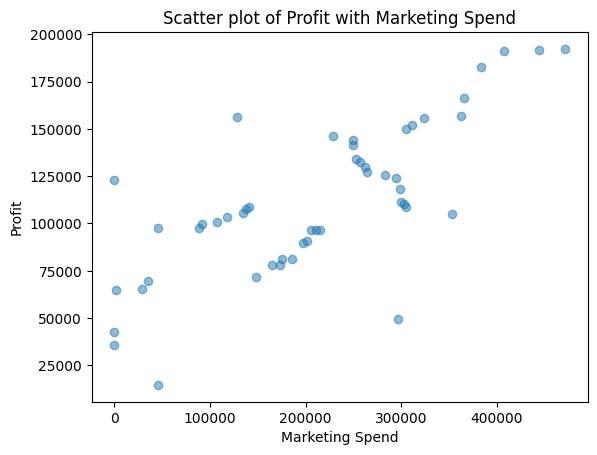

In [20]:
 plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
 plt.title('Scatter plot of Profit with Marketing Spend')
 plt.xlabel('Marketing Spend')
 plt.ylabel('Profit')
 plt.show()

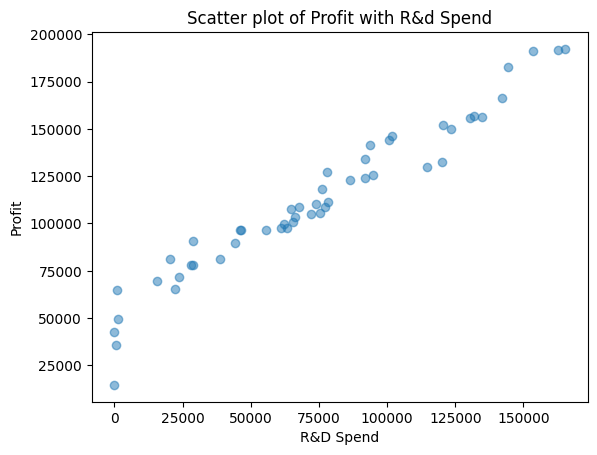

In [23]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&d Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

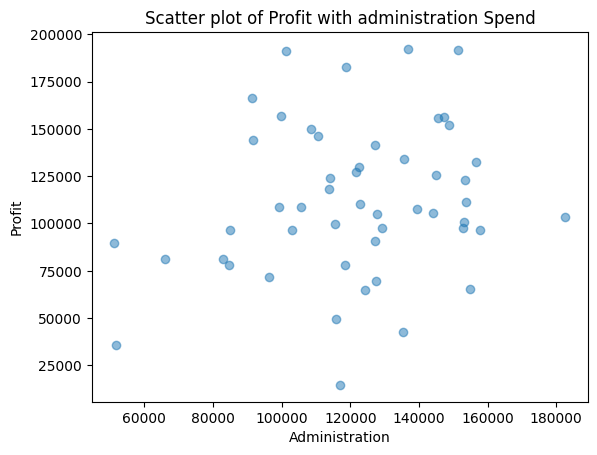

In [24]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with administration Spend')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

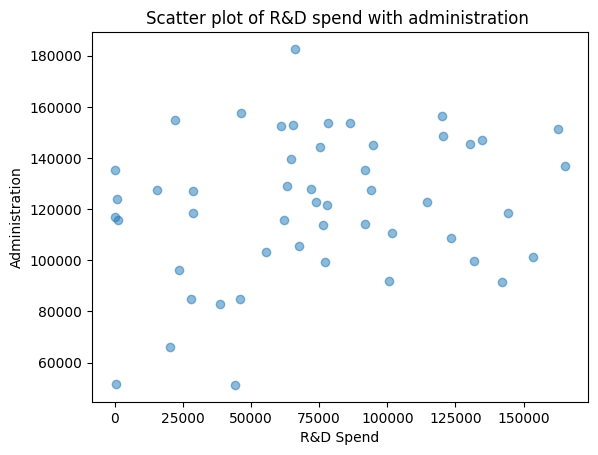

In [28]:
plt.scatter(dataset['R&D Spend'], dataset['Administration'], alpha=0.5)
plt.title('Scatter plot of R&D spend with administration ')
plt.xlabel('R&D Spend')
plt.ylabel('Administration')
plt.show()

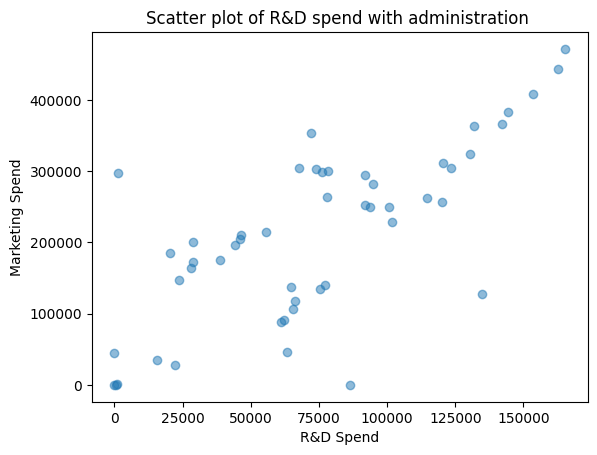

In [30]:
plt.scatter(dataset['R&D Spend'], dataset['Marketing Spend'], alpha=0.5)
plt.title('Scatter plot of R&D spend with administration ')
plt.xlabel('R&D Spend')
plt.ylabel('Marketing Spend')
plt.show()

Text(0, 0.5, 'Profit')

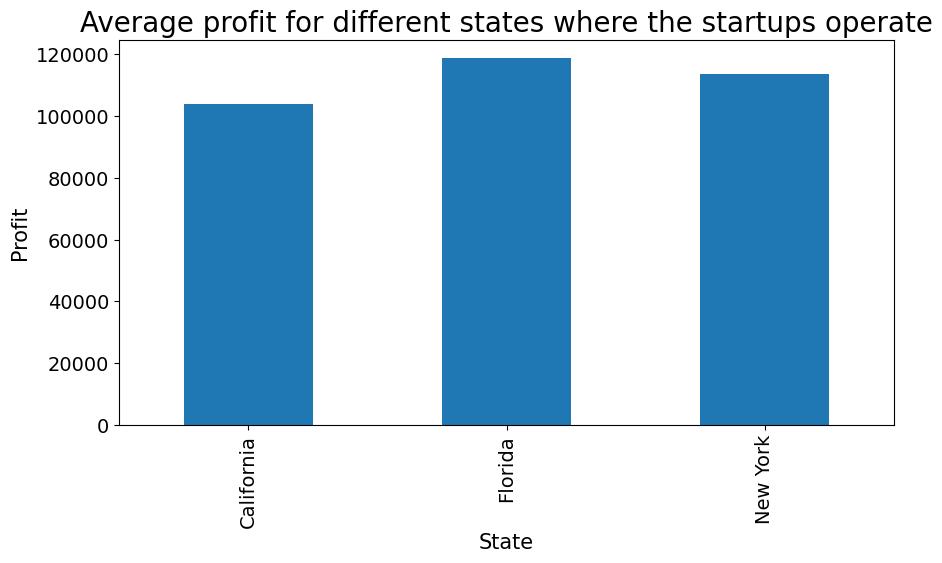

In [35]:
 ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize = (10,5),fontsize = 14)
 ax.set_title("Average profit for different states where the startups operate", fontsize = 20)
 ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(figsize = (10,5),fontsize = 14)
 ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

 ax.set_xlabel("State", fontsize = 15)
 ax.set_ylabel("Profit", fontsize = 15)

In [38]:
dataset.State.value_counts()

,count
State,
New York,17
California,17
Florida,16


In [39]:
 dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
 dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
 dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)
 # Drop the original column State from the dataframe
 dataset.drop(columns=['State'],axis=1,inplace=True)
 dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [40]:
 dependent_variable = 'Profit'

In [41]:
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})
independent_variables

['NewYork_State',
 'R&D Spend',
 'California_State',
 'Marketing Spend',
 'Florida_State',
 'Administration']

In [42]:
 X = dataset[independent_variables].values
 y = dataset[dependent_variable].values
 dataset[independent_variables]

,NewYork_State,R&D Spend,California_State,Marketing Spend,Florida_State,Administration
0,1,165349.20,0,471784.10,0,136897.80
1,0,162597.70,1,443898.53,0,151377.59
2,0,153441.51,0,407934.54,1,101145.55
3,1,144372.41,0,383199.62,0,118671.85
4,0,142107.34,0,366168.42,1,91391.77
5,1,131876.90,0,362861.36,0,99814.71
6,0,134615.46,1,127716.82,0,147198.87
7,0,130298.13,0,323876.68,1,145530.06
8,1,120542.52,0,311613.29,0,148718.95
9,0,123334.88,1,304981.62,0,108679.17


In [47]:
#splitting the data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [48]:
X_train[0:10]

array([[0.0000000e+00, 5.5493950e+04, 0.0000000e+00, 2.1463481e+05,
        1.0000000e+00, 1.0305749e+05],
       [1.0000000e+00, 4.6014020e+04, 0.0000000e+00, 2.0551764e+05,
        0.0000000e+00, 8.5047440e+04],
       [0.0000000e+00, 7.5328870e+04, 0.0000000e+00, 1.3405007e+05,
        1.0000000e+00, 1.4413598e+05],
       [0.0000000e+00, 4.6426070e+04, 1.0000000e+00, 2.1079767e+05,
        0.0000000e+00, 1.5769392e+05],
       [0.0000000e+00, 9.1749160e+04, 0.0000000e+00, 2.9491957e+05,
        1.0000000e+00, 1.1417579e+05],
       [0.0000000e+00, 1.3029813e+05, 0.0000000e+00, 3.2387668e+05,
        1.0000000e+00, 1.4553006e+05],
       [0.0000000e+00, 1.1994324e+05, 0.0000000e+00, 2.5651292e+05,
        1.0000000e+00, 1.5654742e+05],
       [1.0000000e+00, 1.0002300e+03, 0.0000000e+00, 1.9039300e+03,
        0.0000000e+00, 1.2415304e+05],
       [1.0000000e+00, 5.4205000e+02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 5.1743150e+04],
       [1.0000000e+00, 6.5605480e+04,

In [50]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train[0:10]

array([[0.        , 0.33561668, 0.        , 0.45494286, 1.        ,
        0.48655174],
       [1.        , 0.2782839 , 0.        , 0.43561799, 0.        ,
        0.3173015 ],
       [0.        , 0.45557444, 0.        , 0.28413435, 1.        ,
        0.87258866],
       [0.        , 0.2807759 , 1.        , 0.44680961, 0.        ,
        1.        ],
       [0.        , 0.55488118, 0.        , 0.62511553, 1.        ,
        0.59103645],
       [0.        , 0.7880179 , 0.        , 0.68649342, 1.        ,
        0.88568959],
       [0.        , 0.72539353, 0.        , 0.54370828, 1.        ,
        0.98922572],
       [1.        , 0.0060492 , 0.        , 0.0040356 , 0.        ,
        0.6847981 ],
       [1.        , 0.00327821, 0.        , 0.        , 0.        ,
        0.00432296],
       [1.        , 0.39676926, 0.        , 0.22709197, 0.        ,
        0.95618996]])

In [54]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
regressor.intercept_

44153.954667848615

In [56]:
regressor.coef_

array([ 7.86007422e+02,  1.27892182e+05,  8.66383692e+01,  1.72720281e+04,
       -8.72645791e+02,  3.49927567e+03])

In [59]:
 y_pred_train = regressor.predict(X_train)
 y_train


array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [62]:
 y_pred = regressor.predict(X_test)

In [63]:
mean_squared_error(y_test, y_pred)

83502864.03257714

In [64]:
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [65]:
 r2_score(y_train, y_pred_train)

0.9501847627493607

In [67]:
r2_score(y_test, y_pred)

0.9347068473282427